# Take-home challenge sample

### One of the take-home challenge samples from Galvanize's interview preparation repository

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, hold, ylim, legend, boxplot, setp, axes
%matplotlib inline

## Context

#### There are 2 tasks:

Collect metrics of interest.
Offer insights for how we could improve CPM.
The first task requires specific metrics collection: Find the conversion rate and CPM per campaign within each application. Include all of the code you need to transform and calculate the data.

The second goal is more of an open ended question and involves writing about your methods and reasoning: Given the data that was collected in the first task, what are some metrics we can calculate to give us insights as to how to improve CPM? For this second question, if you don't have enough data or would like to have additional data, please specify the format of the data(the columns in each file) that you would like to have and desscribe your transformations to acquire the information that you need.



## Backgound

**CPM** - cost per 1000 impression

Formula: CPM = (total cost of campaign * 1000) / total number of impressions

Since the question of this practice is weakly defined and missing a lot of imformations. I will define some assumptions for this questions. 

1. the number of *offers* will be "impressions" and the number of *engagement* will be "clicks"
2. the campaign cost is missing - I will set all the campaign costs to 1,000


**Campaign** - a specific, defined series of activities used in marketing a new or changed product or service


---

## Task 1 - Calculate conversion rate and CPM

In [2]:
engagement = pd.read_csv('https://raw.githubusercontent.com/gSchool/dsi-interview-prep/master/interview_questions/takehomes/takehome1/example_engagements.csv?token=AfcppxqXZaAL5zIr5EjjiNTdiAyin4Odks5cFD4EwA%3D%3D')

In [3]:
offers = pd.read_csv('https://raw.githubusercontent.com/gSchool/dsi-interview-prep/master/interview_questions/takehomes/takehome1/example_offers.csv?token=AfcppzaFmL-AsJKiJoUDUkB7F-lb2FqEks5cFD4pwA%3D%3D')

#### Simple EDA

In [4]:
engagement.head(5)

,Unnamed: 0,revenue,reward_id,campaign_id,application_id
0,2014-07-26 00:00:29.257095,0.499,53d2ef9d-361c-c0d1-9015-6525c28c8564,18,3
1,2014-07-26 00:00:30.468959,0.149,53d2ef9e-72f3-84bf-a243-78ae58d1626f,4,0
2,2014-07-26 00:00:43.396503,0.149,53d2efab-91fb-ec54-3435-40a502e34e83,4,3
3,2014-07-26 00:01:01.234404,0.149,53d2efbd-8f91-db89-12d3-c373bcde9c30,4,3
4,2014-07-26 00:01:15.100982,0.149,53d2efcb-3e74-a234-f986-938765766950,4,0


In [28]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 5 columns):
Unnamed: 0        2441 non-null object
revenue           2441 non-null float64
reward_id         2441 non-null object
campaign_id       2441 non-null int64
application_id    2441 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 95.4+ KB


In [6]:
set(engagement.revenue);

In [7]:
offers.head()

,Unnamed: 0,reward_id,application_id,campaign_id
0,2014-07-26 00:00:02.995009,53d2ef83-0008-50fd-80b6-022bd353332d,0,0
1,2014-07-26 00:00:03.114537,53d2ef83-1860-7515-2f58-bc73db3b6ce8,1,1
2,2014-07-26 00:00:03.738329,53d2ef83-dc59-4efc-8e6d-1840b994e96d,0,2
3,2014-07-26 00:00:04.333408,53d2ef84-ef12-f2f9-799f-d549f4acf691,1,0
4,2014-07-26 00:00:05.023120,53d2ef85-a900-e839-b0e5-4d07d619fa58,0,0


### Conversion

#### Outer join two tables by application id, campaign id, and reward id

In [114]:
df = offers.merge(engagement, how = 'outer', on = ['application_id', 'campaign_id', 'reward_id'])
df.head()

,Unnamed: 0_x,reward_id,application_id,campaign_id,Unnamed: 0_y,revenue
0,2014-07-26 00:00:02.995009,53d2ef83-0008-50fd-80b6-022bd353332d,0,0,NaN,NaN
1,2014-07-26 00:00:03.114537,53d2ef83-1860-7515-2f58-bc73db3b6ce8,1,1,NaN,NaN
2,2014-07-26 00:00:03.738329,53d2ef83-dc59-4efc-8e6d-1840b994e96d,0,2,NaN,NaN
3,2014-07-26 00:00:04.333408,53d2ef84-ef12-f2f9-799f-d549f4acf691,1,0,NaN,NaN
4,2014-07-26 00:00:05.023120,53d2ef85-a900-e839-b0e5-4d07d619fa58,0,0,NaN,NaN


In [115]:
df = df[['reward_id', 'application_id', 'campaign_id', 'revenue']]

In [202]:
# number of impression - total count
imp_count = df.groupby(['application_id', 'campaign_id'])['reward_id'].count()

# number of clicks - revenue is not null
click_count = df[df['revenue'].notnull()].groupby(['application_id', 'campaign_id'])['reward_id'].count()

In [203]:
# change to percentage
conversion_rate_serie = (click_count/imp_count) * 100

In [204]:
conversion_rate_serie = conversion_rate_serie.fillna(0)

In [205]:
conversion_df = conversion_rate.to_frame()

#### Conversion rate table

In [167]:
conversion_df.head()

reward_id
application_id campaign_id           
0              0             1.532567
               2             0.370370
               4             5.514706
               5             2.424242
               7             0.471945

### CPM

Since I have defined the cost to be 100, the cost will 100

In [198]:
#CPM

CPM_serie = (100 * 1000)/imp_count;

In [199]:
CPM_df = CPM_serie.to_frame()

In [200]:
CPM_df.head()

reward_id
application_id campaign_id            
0              0            383.141762
               2            370.370370
               4             18.382353
               5            606.060606
               7             52.438385

## Task 2 - Analysis

After calculated the conversion rate and CPM above, look the who are the top 10 performancers. We can then build graphs to visualize the differences.

In [179]:
conversion_df.head()

reward_id
application_id campaign_id           
0              0             1.532567
               2             0.370370
               4             5.514706
               5             2.424242
               7             0.471945

In [191]:
# top 5 performers
conversion_df.sort_values(by=['reward_id'], ascending=False).head(5)

reward_id
application_id campaign_id           
1              89           50.000000
0              90           37.500000
3              71           33.333333
               55           25.000000
               4            17.195712

In [214]:
top_ten = conversion_df.sort_values(by=['reward_id'], ascending=False)[:5]
others = conversion_df.sort_values(by=['reward_id'], ascending=False)[5:]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


NameError: name 'setBoxColors' is not defined

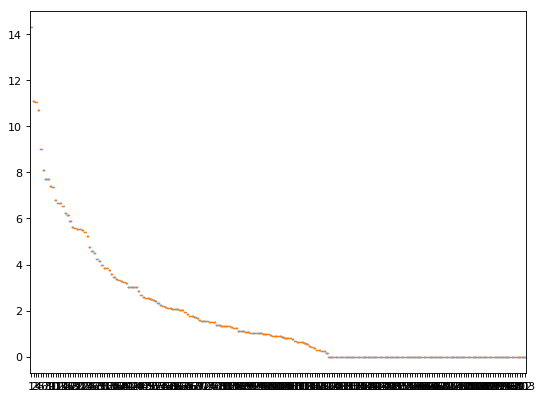

In [281]:
fig = figure(num=None, figsize=(8, 6), dpi=80)
ax = axes()
hold(True)

# first boxplot pair
bp = boxplot(others, widths = 0.6)
#boxprops=boxprops,
 #               medianprops=medianprops)
setBoxColors(bp)

# second boxplot pair
bp = boxplot(top_ten, widths = 0.6)
             #boxprops=boxprops2,
                #medianprops=medianprops2)
setBoxColors(bp)


# boxprops = dict(linestyle='-', linewidth=4, color='green')
# medianprops = dict(linestyle='-', linewidth=4, color='green')


# boxprops2 = dict(linestyle='-', linewidth=4, color='yellow')
# medianprops2 = dict(linestyle='-', linewidth=4, color='red')

# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'b-')
hR, = plot([1,1],'r-')
legend((hB, hR),('Apples', 'Oranges'))
hB.set_visible(False)
hR.set_visible(False)

savefig('boxcompare.png')
show()






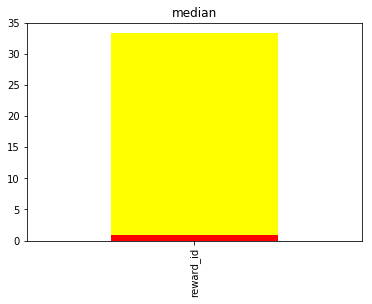

In [258]:
top_ten.median().plot(kind='bar', color = "yellow")
others.median().plot(kind='bar', color = "red", title = 'median');

In [221]:
top_ten.describe()

,reward_id
count,5.000000
mean,32.605809
std,12.473569
min,17.195712
25%,25.000000
50%,33.333333
75%,37.500000
max,50.000000


In [223]:
others.describe()

,reward_id
count,203.000000
mean,1.758682
std,2.502743
min,0.000000
25%,0.000000
50%,0.895522
75%,2.451791
max,14.285714


-----

In [226]:
plt.bar(top_ten.reward_id.median())

33.33333333333333

In [ ]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
>>> ax = df.plot.bar(x='lab', y='val', rot=0)

In [228]:
DF = pd.concat([top_ten, others],keys=['reward_id'])
DF
#DFGPlot = DF.mean().unstack('reward_id').plot(kind='bar')

reward_id
          application_id campaign_id           
reward_id 1              89           50.000000
          0              90           37.500000
          3              71           33.333333
                         55           25.000000
                         4            17.195712